In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
test_datagen = ImageDataGenerator(rescale = 1./255)

test_path_CSP_JEDM = '/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CSP-JEDM)'
test_path_CSP_JEA = '/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CSP-JEA)'
test_path_CVP_JEDM = '/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CVP-JEDM)'
test_path_CVP_JEA = '/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CVP-JEA)'

num_ex_CSP_JEDM = glob('/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CSP-JEDM)/*')
num_ex_CSP_JEA = glob('/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CSP-JEA)/*')
num_ex_CVP_JEDM = glob('/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CVP-JEDM)/*')
num_ex_CVP_JEA = glob('/content/drive/MyDrive/ES327- Individual Project/Testing Datasets/Testing (CVP-JEA)/*')


test_set_CSP_JEDM = test_datagen.flow_from_directory(test_path_CSP_JEDM,
                                            target_size = (224, 224),
                                            batch_size = len(num_ex_CSP_JEDM),
                                            class_mode = 'categorical')
test_set_CSP_JEA = test_datagen.flow_from_directory(test_path_CSP_JEA,
                                            target_size = (224, 224),
                                            batch_size = len(num_ex_CSP_JEA),
                                            class_mode = 'categorical')
test_set_CVP_JEDM = test_datagen.flow_from_directory(test_path_CVP_JEDM,
                                            target_size = (224, 224),
                                            batch_size = len(num_ex_CVP_JEDM),
                                            class_mode = 'categorical')
test_set_CVP_JEA = test_datagen.flow_from_directory(test_path_CVP_JEA,
                                            target_size = (224, 224),
                                            batch_size = len(num_ex_CVP_JEA),
                                            class_mode = 'categorical')

Found 1013 images belonging to 10 classes.
Found 1013 images belonging to 10 classes.
Found 1667 images belonging to 10 classes.
Found 1667 images belonging to 10 classes.


In [78]:
from tensorflow.keras.models import load_model
model_CSP_JEDM = load_model('/content/drive/MyDrive/ES327- Individual Project/Final ResNet Models (all 4 networks)/model_resnet101V2_CSP_JEDM_V2_(200 epochs)_LR_0_015_shuffle_Batch64_L2_00001.h5')
model_CSP_JEA = load_model('/content/drive/MyDrive/ES327- Individual Project/Final ResNet Models (all 4 networks)/model_resnet101V2_CSP_JEA_V2_(200 epochs)_LR_0_015_shuffle_Batch64_L2_00001.h5') 
model_CVP_JEDM = load_model('/content/drive/MyDrive/ES327- Individual Project/Final ResNet Models (all 4 networks)/model_resnet101V2_CVP_JEDM_V2_(200 epochs)_LR_0_015_shuffle_Batch64_L2_00001.h5')
model_CVP_JEA = load_model('/content/drive/MyDrive/ES327- Individual Project/Final ResNet Models (all 4 networks)/model_resnet101V2_CVP_JEA_V2_(200 epochs)_LR_0_015_shuffle_Batch64_L2_00001.h5')


In [23]:
import numpy as np
a = np.array([[1,1,1],[1,1,1],[1,1,1]])
b = np.array([[2,2,2],[2,2,2],[2,2,2]])

c = (a+b)*0.5
print(c)

[[1.5 1.5 1.5]
 [1.5 1.5 1.5]
 [1.5 1.5 1.5]]


In [83]:
y_pred_CSP_JEDM = model_CSP_JEDM.predict(test_set_CSP_JEDM, verbose=1) #initially verbose = 0
#y_pred_CSP_JEA = model_CSP_JEA.predict(test_set_CSP_JEA)
#y_pred_CVP_JEDM = model_CVP_JEDM.predict(test_set_CVP_JEDM)
#y_pred_CVP_JEA = model_CVP_JEA.predict(test_set_CVP_JEA)

#y_pred_CSP = (y_pred_CSP_JEDM + y_pred_CSP_JEA)*0.5
#y_pred_CVP = (y_pred_CVP_JEDM + y_pred_CVP_JEA)*0.5

102/102 [==============================] - 269s 3s/step


In [84]:
y_pred_CSP_JEA = model_CSP_JEA.predict(test_set_CSP_JEA, verbose=1) #initially verbose = 0

102/102 [==============================] - 269s 3s/step


In [85]:
y_pred_CVP_JEDM = model_CVP_JEDM.predict(test_set_CVP_JEDM, verbose=1) #initially verbose = 0

167/167 [==============================] - 443s 3s/step


In [86]:
y_pred_CVP_JEA = model_CVP_JEA.predict(test_set_CVP_JEA, verbose=1) #initially verbose = 0

167/167 [==============================] - 446s 3s/step


In [87]:
y_pred_CSP = (y_pred_CSP_JEDM + y_pred_CSP_JEA)*0.5
y_pred_CVP = (y_pred_CVP_JEDM + y_pred_CVP_JEA)*0.5

In [37]:
y_eval_CSP_JEDM = model_CSP_JEDM.evaluate(test_set_CSP_JEDM)
y_eval_CSP_JEA = model_CSP_JEA.evaluate(test_set_CSP_JEA)
y_eval_CVP_JEDM = model_CVP_JEDM.evaluate(test_set_CVP_JEDM)
y_eval_CVP_JEA = model_CVP_JEA.evaluate(test_set_CVP_JEA)

27/27 [==============================] - 425s 16s/step - loss: 498.2709 - accuracy: 0.4505


In [88]:
import numpy as np
print(y_pred_CSP_JEDM.shape)

(1013, 10)


In [89]:
import numpy as np
#print(y_pred_CVP_JEA.shape)
y_pred_CSP_JEDM_cl = np.argmax(y_pred_CSP_JEDM, axis=1)
y_pred_CSP_JEA_cl= np.argmax(y_pred_CSP_JEA, axis=1)
y_pred_CVP_JEDM_cl = np.argmax(y_pred_CVP_JEDM, axis=1)
y_pred_CVP_JEA_cl = np.argmax(y_pred_CVP_JEA, axis=1)

y_pred_CSP_cl = np.argmax(y_pred_CSP, axis=1)
y_pred_CVP_cl = np.argmax(y_pred_CVP, axis=1)

CSP JEDM confusion matrix
CSP JEA confusion matrix
CVP JEDM confusion matrix
CVP JEA confusion matrix
CSP confusion matrix
CVP confusion matrix


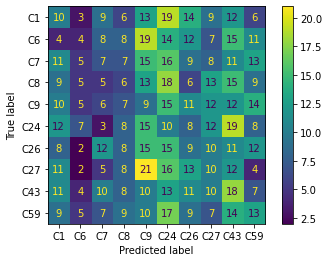

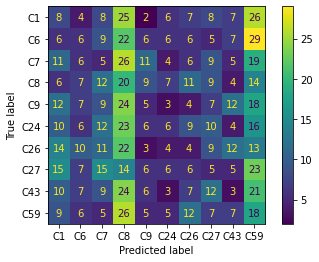

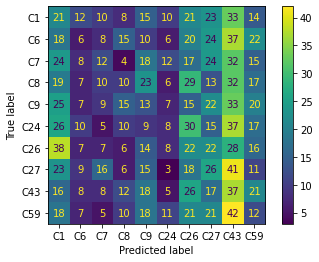

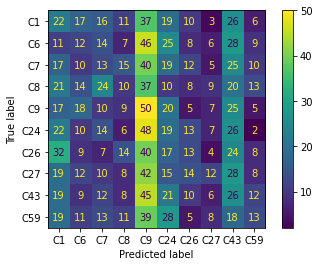

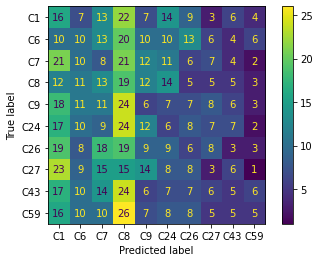

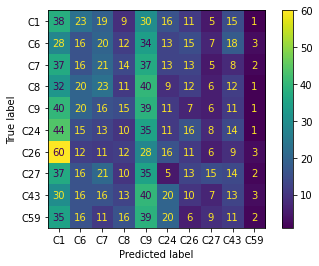

In [90]:
#CODE TO OUTPUT CONFUSION MATRIX

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_CSP_JEDM = confusion_matrix(test_set_CSP_JEDM.classes, y_pred_CSP_JEDM_cl)
disp_CSP_JEDM = ConfusionMatrixDisplay(confusion_matrix = cm_CSP_JEDM, display_labels = ['C1','C6','C7','C8','C9','C24','C26','C27','C43','C59'])
print('CSP JEDM confusion matrix')
disp_CSP_JEDM.plot() 

cm_CSP_JEA = confusion_matrix(test_set_CSP_JEA .classes, y_pred_CSP_JEA_cl)
disp_CSP_JEA  = ConfusionMatrixDisplay(confusion_matrix = cm_CSP_JEA , display_labels = ['C1','C6','C7','C8','C9','C24','C26','C27','C43','C59'])
print('CSP JEA confusion matrix')
disp_CSP_JEA .plot() 

cm_CVP_JEDM = confusion_matrix(test_set_CVP_JEDM.classes, y_pred_CVP_JEDM_cl)
disp_CVP_JEDM = ConfusionMatrixDisplay(confusion_matrix = cm_CVP_JEDM, display_labels = ['C1','C6','C7','C8','C9','C24','C26','C27','C43','C59'])
print('CVP JEDM confusion matrix')
disp_CVP_JEDM.plot() 

cm_CVP_JEA = confusion_matrix(test_set_CVP_JEA.classes, y_pred_CVP_JEA_cl)
disp_CVP_JEA = ConfusionMatrixDisplay(confusion_matrix = cm_CVP_JEA, display_labels = ['C1','C6','C7','C8','C9','C24','C26','C27','C43','C59'])
print('CVP JEA confusion matrix')
disp_CVP_JEA.plot() 

cm_CSP = confusion_matrix(test_set_CSP_JEDM.classes, y_pred_CSP_cl)
disp_CSP = ConfusionMatrixDisplay(confusion_matrix = cm_CSP, display_labels = ['C1','C6','C7','C8','C9','C24','C26','C27','C43','C59'])
print('CSP confusion matrix')
disp_CSP.plot() 

cm_CVP = confusion_matrix(test_set_CVP_JEDM.classes, y_pred_CVP_cl)
disp_CVP = ConfusionMatrixDisplay(confusion_matrix = cm_CVP, display_labels = ['C1','C6','C7','C8','C9','C24','C26','C27','C43','C59'])
print('CVP confusion matrix')
disp_CVP.plot() 

In [91]:
from sklearn.metrics import accuracy_score
'''
print(test_set_CSP_JEDM.classes)
print(y_pred_CSP_JEDM)
'''
a1 = accuracy_score(test_set_CSP_JEDM.classes, y_pred_CSP_JEDM_cl)
a2 = accuracy_score(test_set_CSP_JEA.classes, y_pred_CSP_JEA_cl)
a3 = accuracy_score(test_set_CVP_JEDM.classes, y_pred_CVP_JEDM_cl)
a4 = accuracy_score(test_set_CVP_JEA.classes, y_pred_CVP_JEA_cl)
a5 = accuracy_score(test_set_CSP_JEA.classes, y_pred_CSP_cl)
a6 = accuracy_score(test_set_CVP_JEDM.classes, y_pred_CVP_cl)
'''
temp = sum(test_set_CSP_JEDM.classes == y_pred_CSP_JEDM)
atest = temp/len(test_set_CSP_JEDM.classes)
print(atest)
'''
print(a1)
print(a2)
print(a3)
print(a4)
print(a5)
print(a6)



0.0947680157946693
0.07897334649555775
0.10017996400719856
0.11397720455908818
0.08292201382033564
0.10617876424715057
